# Lasso Regression 

###### dhruv patel BDA 17162121014

##### Loading Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge

from sklearn.metrics import accuracy_score

In [3]:
data = load_breast_cancer()  # loading data
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [4]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [5]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [6]:
df = pd.DataFrame(data.data,columns=data.feature_names)

In [7]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [10]:
X = data.data

In [11]:
y = data.target

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

### Building Models

In [13]:
lr = LinearRegression()

In [14]:
lr.fit(X_train,y_train)

LinearRegression()

In [15]:
lr.score(X_test,y_test)  ## test score for linear regression

0.739386998952047

In [16]:
lasso_1e1 = Lasso(alpha=0.001 , max_iter = 10e6)


In [17]:
lasso_1e1.fit(X_train,y_train)

Lasso(alpha=0.001, max_iter=10000000.0)

In [19]:
lasso_1e1.score(X_test,y_test)  ## we can see that our score is quite low because of alpha

0.7033245684677331

In [20]:
### trying to search best ALpha using GridSearchcv

In [21]:
lasso = Lasso()
param_vals = [1e-20,1e-10,1e-5,1e-1,1,10,100,20]
params = {'alpha':param_vals,"max_iter":[10e5]}

lassso_cv = GridSearchCV(lasso,params,scoring="neg_mean_squared_error",cv=5,n_jobs=4)

lassso_cv.fit(X_train,y_train)

C:\Users\dhruv\anaconda3\envs\ml\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.5364956176210125, tolerance: 0.007471698113207546
  model = cd_fast.enet_coordinate_descent(
C:\Users\dhruv\anaconda3\envs\ml\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.030038076620464, tolerance: 0.00742138364779874
  model = cd_fast.enet_coordinate_descent(
C:\Users\dhruv\anaconda3\envs\ml\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.172295272619992, tolerance: 0.007446855345911951
  model = cd_fast.enet_coordinate_descent(
C:\Users\dhruv\anaconda3\envs\ml\lib\site-packages\sklearn\linear_model\_coo

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-20, 1e-10, 1e-05, 0.1, 1, 10, 100, 20],
                         'max_iter': [1000000.0]},
             scoring='neg_mean_squared_error')

In [22]:
lassso_cv.best_params_

{'alpha': 1e-05, 'max_iter': 1000000.0}

In [23]:
lassso_cv.best_score_

-0.062488634237653815

In [24]:
lassso_cv.best_estimator_

Lasso(alpha=1e-05, max_iter=1000000.0)

In [25]:
lassso_cv.cv_results_

{'mean_fit_time': array([3.58654497e+01, 3.28113751e+00, 1.23047647e+00, 4.60119247e-03,
        1.00030899e-03, 8.00228119e-04, 4.00066376e-04, 8.00132751e-04]),
 'std_fit_time': array([5.39236675e-01, 4.65809269e-01, 2.15030476e-01, 3.32364010e-03,
        3.87384339e-07, 4.00114329e-04, 4.89979335e-04, 4.00066575e-04]),
 'mean_score_time': array([0.00020013, 0.00020003, 0.00060024, 0.00040002, 0.00019999,
        0.00020013, 0.        , 0.        ]),
 'std_score_time': array([0.00040026, 0.00040007, 0.0004901 , 0.00048992, 0.00039997,
        0.00040026, 0.        , 0.        ]),
 'param_alpha': masked_array(data=[1e-20, 1e-10, 1e-05, 0.1, 1, 10, 100, 20],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_iter': masked_array(data=[1000000.0, 1000000.0, 1000000.0, 1000000.0, 1000000.0,
                    1000000.0, 1000000.0, 1000000.0],
              mask=[False, False, False, False, False, F

In [35]:
lasso_best_estimator = Lasso(alpha=1e-05,max_iter=1000000.0)


In [37]:
lasso_best_estimator.fit(X_train,y_train)

Lasso(alpha=1e-05, max_iter=1000000.0)

In [38]:
lasso_best_estimator.score(X_test,y_test)

0.7438235254978831

In [29]:
lasso_1e1.score(X_test,y_test)

0.7033245684677331

#### thus after using gridsearchcv we found the best hyperparameters for our Lasso Reg and got a score more than LinearRegression 

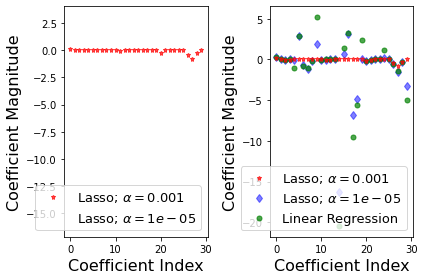

In [45]:
plt.subplot(1,2,1)
plt.plot(lasso_1e1.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 0.001$',zorder=7) # alpha here is for transparency
plt.plot(lasso_best_estimator.coef_,alpha=1e-05,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 1e-05$') # alpha here is for transparency

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)

plt.subplot(1,2,2)
plt.plot(lasso_1e1.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 0.001$',zorder=7) # alpha here is for transparency
plt.plot(lasso_best_estimator.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 1e-05$') # alpha here is for transparency

plt.plot(lr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=5,color='green',label='Linear Regression',zorder=2)
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.tight_layout()
plt.show()

#### thus we successfully demonstrated how we can improve the accuracy of our model using Normalization techniques like Lasso Regression